## solution of nonlinear systems

Let solve system:


$\begin{equation*}
 \begin{cases}
   e^{x_1x_2} = x_1^2-x_2+1, 
   \\
   (x_1 + 0.5)^2 + x_2^2 = 1,
   \\
   x_1 < 0, x_2 > 0
 \end{cases}
\end{equation*}$

Let's take it to the following form:

$\begin{equation*}
 \begin{cases}
   e^{x_1x_2} - x_1^2 + x_2 - 1 = 0, 
   \\
   (x_1 + 0.5)^2 + x_2^2 - 1 = 0,
   \\
   x_1 < 0, x_2 > 0
 \end{cases}
\end{equation*}$

In [1]:
eps = 10e-7

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
def f1(x1, x2):
    return np.exp(x1 * x2) - x1**2 + x2 - 1
def f2(x1, x2):
    return (x1 + 0.5)**2 + x2**2 - 1

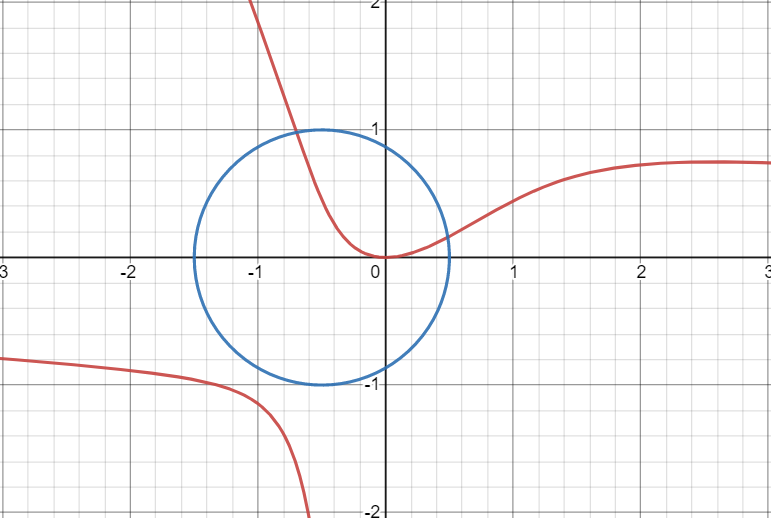

### Newton's method for solving systems:

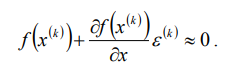
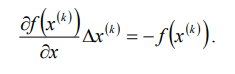
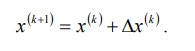

In [4]:
def df1_dx1(x1, x2):
    return x2*np.exp(x1*x2) - 2*x1
def df1_dx2(x1, x2):
    return x1*np.exp(x1*x2) + 1

def df2_dx1(x1,x2):
    return 2*(x1+0.5)
def df2_dx2(x1,x2):
    return 2*x2

In [5]:
x = np.array([-1, 1])
dx = x
tab = [[x[0], x[1], '---']]

while np.linalg.norm(dx) > eps:
    W = np.array([[df1_dx1(x[0], x[1]), df1_dx2(x[0], x[1])],
                 [df2_dx1(x[0], x[1]), df2_dx2(x[0], x[1])]])
    f = np.array([f1(x[0], x[1]), f2(x[0], x[1])])
    dx = np.linalg.solve(W, -f)
    x = x + dx
    tab.append([x[0], x[1], np.linalg.norm(dx)])

In [6]:
table1 = pd.DataFrame(tab, columns = [("Newton","x1"), 
                                     ("Newton", "x2"), 
                                     ("Newton", "||x_k - x_k-1||")])
table1.columns = pd.MultiIndex.from_tuples(table1.columns, names=['',''])
table1

Newton                          
         x1        x2 ||x_k - x_k-1||
0 -1.000000  1.000000             ---
1 -0.735040  1.007480        0.265065
2 -0.697651  0.981334        0.045625
3 -0.696764  0.980452        0.001251
4 -0.696763  0.980451        0.000001

### Secant method:

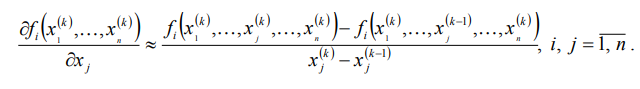

In [7]:
x = np.array([-1, 1])
tab = [[x[0], x[1], '---']]
W = np.array([[df1_dx1(x[0], x[1]), df1_dx2(x[0], x[1])],
                 [df2_dx1(x[0], x[1]), df2_dx2(x[0], x[1])]])

f = np.array([f1(x[0], x[1]), f2(x[0], x[1])])
dx = np.linalg.solve(W, -f)
x2 = x + dx
tab.append([x2[0], x2[1],  np.linalg.norm(dx)])

while np.linalg.norm(dx) > eps:
    W = np.array([[(f1(x2[0], x[1]) - f1(x[0], x[1]))/(x2[0]-x[0]), (f1(x[0], x2[1]) - f1(x[0], x[1]))/(x2[1]-x[1])],
                 [(f2(x2[0], x[1]) - f2(x[0], x[1]))/(x2[0]-x[0]), (f2(x[0], x2[1]) - f2(x[0], x[1]))/(x2[1]-x[1])]])
    
    f = np.array([f1(x2[0], x2[1]), f2(x2[0], x2[1])])
    dx = np.linalg.solve(W, -f)
    
    x = x2
    x2 = x2 + dx
    
    
    tab.append([x2[0], x2[1], np.linalg.norm(dx)])

In [8]:
table2 = pd.DataFrame(tab, columns = [("Secant method","x1"), 
                                     ("Secant method", "x2"), 
                                     ("Secant method", "||x_k - x_k-1||")])
table2.columns = pd.MultiIndex.from_tuples(table2.columns, names=['',''])
table2

Secant method                          
             x1        x2 ||x_k - x_k-1||
0     -1.000000  1.000000             ---
1     -0.735040  1.007480        0.265065
2     -0.702330  0.984458            0.04
3     -0.696904  0.980581        0.006668
4     -0.696764  0.980452        0.000191
5     -0.696763  0.980451        0.000001

***Let's describe the algorithm***
We will solve the system using the Gauss-Seidel method, then as an internal method, we will use the Newton method.

The outer part of the algorithm is to solve the system:
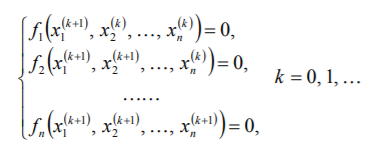

Finding each new value $x_i^{(k+1)} $ requires solving, generally speaking, a nonlinear equation: 
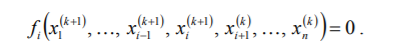
Which we will solve by Newton's method, then in the general case, Newton's method looks like this:
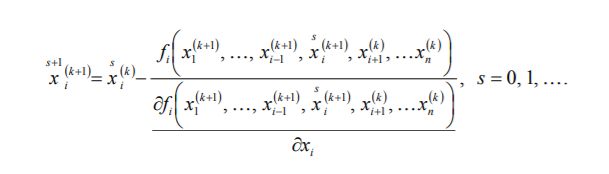

The internal iterative process is carried out sequentially until convergence for
all components, then proceed to the next step of external iterations, as the initial approximation, you can take the value
of the corresponding component obtained at the previous external iteration.

As a stop of Newton's method, we can take $||x^{k} - x^{k-1}|| < eps$, and for the Gauss-Seidel method $||f_i(x)|| < eps$

In [9]:
def df1_dx1(x1, x2):
    return x2*np.exp(x1*x2) - 2*x1
def df2_dx2(x1, x2):
    return 2*x2

In [10]:
x1 = -1
x2 = 1

tab = [[x1, x2, '---']]

while max(abs(f1(x1, x2)), abs(f2(x1, x2))) > eps:
    x1_prev = x1
    x1 = x1_prev - f1(x1, x2) / df1_dx1(x1, x2)
    while abs(x1 - x1_prev) > eps:
        x1_prev = x1
        x1 = x1_prev - f1(x1, x2) / df1_dx1(x1, x2)
        
    x2_prev = x2
    x2 = x2_prev - f2(x1, x2) / df2_dx2(x1, x2)
    while abs(x2 - x2_prev) > eps:
        x2_prev = x2
        x2 = x2_prev - f2(x1, x2) / df2_dx2(x1, x2)
        
    tab.append([x1, x2, max(abs(f1(x1, x2)), abs(f2(x1, x2)))])

In [11]:
table3 = pd.DataFrame(tab, columns = [("Gauss–Seidel method","x1"), 
                                     ("Gauss–Seidel method", "x2"), 
                                     ("Gauss–Seidel method", "||f(x_k) - f(x_k-1)||")])
table3.columns = pd.MultiIndex.from_tuples(table3.columns, names=['',''])
table3

Gauss–Seidel method                                
                   x1        x2 ||f(x_k) - f(x_k-1)||
0           -1.000000  1.000000                   ---
1           -0.703467  0.979082              0.013582
2           -0.696293  0.980545              0.000948
3           -0.696795  0.980445              0.000065
4           -0.696761  0.980452              0.000004
5           -0.696763  0.980451                   0.0

In [12]:
pd.concat([table1, table2, table3], axis=1).fillna('-')

Newton                           Secant method                            \
         x1        x2 ||x_k - x_k-1||            x1        x2 ||x_k - x_k-1||   
0      -1.0       1.0             ---     -1.000000  1.000000             ---   
1  -0.73504   1.00748        0.265065     -0.735040  1.007480        0.265065   
2 -0.697651  0.981334        0.045625     -0.702330  0.984458            0.04   
3 -0.696764  0.980452        0.001251     -0.696904  0.980581        0.006668   
4 -0.696763  0.980451        0.000001     -0.696764  0.980452        0.000191   
5         -         -               -     -0.696763  0.980451        0.000001   

  Gauss–Seidel method                                  
                   x1        x2 ||f(x_k) - f(x_k-1)||  
0           -1.000000  1.000000                   ---  
1           -0.703467  0.979082              0.013582  
2           -0.696293  0.980545              0.000948  
3           -0.696795  0.980445              0.000065  
4           -0.696761  0.980452              0.000004  
5           -0.696763  0.980451                   0.0